In [52]:
import api
import data
import datetime
import math


In [53]:
port = 9000
config = api.CloudberryConfig(f'http://localhost:{port}')
raw_api = api.RawDataApi(config)
flux_api = api.FluxDataApi(config)
stats_api = api.StatisticsDataApi(config)

In [30]:
# File upload test
uploader = api.FileUploader(config)

experiment_name = 'EMAS'
headers_keys = {
            "[WH]": "[W]",
            "[SH]": "[S]",
            "[BH]": "[B]"
}
headers_measurements = {
            "[W]": "workplace_log",
            "[S]": "summary_log",
            "[B]": "best_solution_log"
}

import_details = api.ImportDetails(headers_keys, headers_measurements)

response = uploader.upload_file('emas-20190412T120536.log', experiment_name, import_details)
print(response)

True


In [6]:
get_current_timestamp = lambda: math.trunc(datetime.datetime.utcnow().timestamp())

custom_bucket_name = None

measurement_name = 'notebook_demo_log'
computation_data = [
    api.ComputationData(
        time=get_current_timestamp(),
        fields={'python': 1, 'cloudberry': 2},
        tags={'evaluation_id': '3e29294d-bf7c-43c6-86b8-c9073de2685f'}
    )
]

r = raw_api.save_measurement_data(computation_data, measurement_name, custom_bucket_name)
r

True

In [5]:
tags = {'evaluation_id': '3e29294d-bf7c-43c6-86b8-c9073de2685f'}
fields = {'python': 1}

result = raw_api.get_measurement_data(api.LogFilters(tags, fields), measurement_name, custom_bucket_name)
result

[{'result': '_result',
  'table': 0,
  '_start': 0.0,
  '_stop': 1594496063.224845,
  '_time': 1593379990.0,
  '_measurement': 'notebook_demo_log',
  'evaluation_id': '3e29294d-bf7c-43c6-86b8-c9073de2685f',
  'cloudberry': 2,
  'python': 1},
 {'result': '_result',
  'table': 0,
  '_start': 0.0,
  '_stop': 1594496063.224845,
  '_time': 1593380998.0,
  '_measurement': 'notebook_demo_log',
  'evaluation_id': '3e29294d-bf7c-43c6-86b8-c9073de2685f',
  'cloudberry': 2,
  'python': 1},
 {'result': '_result',
  'table': 0,
  '_start': 0.0,
  '_stop': 1594496063.224845,
  '_time': 1593535804.0,
  '_measurement': 'notebook_demo_log',
  'evaluation_id': '3e29294d-bf7c-43c6-86b8-c9073de2685f',
  'cloudberry': 2,
  'python': 1},
 {'result': '_result',
  'table': 0,
  '_start': 0.0,
  '_stop': 1594496063.224845,
  '_time': 1593538910.0,
  '_measurement': 'notebook_demo_log',
  'evaluation_id': '3e29294d-bf7c-43c6-86b8-c9073de2685f',
  'cloudberry': 2,
  'python': 1},
 {'result': '_result',
  'table'

In [6]:
df = api.as_data_frame(result)

In [7]:
import pandas as pd
pd.DataFrame(result)

,result,table,_start,_stop,_time,_measurement,evaluation_id,cloudberry,python
0,_result,0,0.0,1.594496e+09,1.593380e+09,notebook_demo_log,3e29294d-bf7c-43c6-86b8-c9073de2685f,2,1
1,_result,0,0.0,1.594496e+09,1.593381e+09,notebook_demo_log,3e29294d-bf7c-43c6-86b8-c9073de2685f,2,1
2,_result,0,0.0,1.594496e+09,1.593536e+09,notebook_demo_log,3e29294d-bf7c-43c6-86b8-c9073de2685f,2,1
3,_result,0,0.0,1.594496e+09,1.593539e+09,notebook_demo_log,3e29294d-bf7c-43c6-86b8-c9073de2685f,2,1
4,_result,0,0.0,1.594496e+09,1.594489e+09,notebook_demo_log,3e29294d-bf7c-43c6-86b8-c9073de2685f,2,1


In [8]:
raw_api.delete_measurement_data('workplace_log')

True

In [75]:
# Example use case no. 1 - compare selected evaluations
evaluation_ids = ['5f0a35ea3c9eb043aa0ade95', '5f0ae1c0afc14f642c405029']
compared_field = 'AVERAGE_FITNESS'
measurement = 'workplace_log'

r = stats_api.compare_evaluations(evaluation_ids, compared_field, measurement)
r

[{'seriesName': '5f0a35ea3c9eb043aa0ade95',
  'data': [{'result': '_result',
    'table': 0,
    '_start': 0.0,
    '_stop': 1594582191.8030019,
    '_time': 5.013091548,
    '_measurement': 'workplace_log',
    'evaluationId': '5f0a35ea3c9eb043aa0ade95',
    'ENERGY_SUM': 2459.5030988546378,
    'POPULATION_SIZE': 102.0,
    'WORKPLACE_ID': 0.0,
    'STEP_NUMBER': 4177.0,
    'TIME': 5013091548.0,
    'AVERAGE_FITNESS': 4.5770462784680515,
    '[WH]': '[W]'},
   {'result': '_result',
    'table': 0,
    '_start': 0.0,
    '_stop': 1594582191.8030019,
    '_time': 10.002131168,
    '_measurement': 'workplace_log',
    'evaluationId': '5f0a35ea3c9eb043aa0ade95',
    'ENERGY_SUM': 2449.4325282454074,
    'POPULATION_SIZE': 101.0,
    'WORKPLACE_ID': 0.0,
    'STEP_NUMBER': 10092.0,
    'TIME': 10002131168.0,
    'AVERAGE_FITNESS': 4.574656756011093,
    '[WH]': '[W]'},
   {'result': '_result',
    'table': 0,
    '_start': 0.0,
    '_stop': 1594582191.8030019,
    '_time': 15.014142755,


In [76]:
data_series = data.DataHelpers.get_data_series(r)

In [56]:
series_one = next(s for s in data_series if s.series_name == evaluation_ids[0])
series_one_df = series_one.get_data_frame()

series_one_df

,result,table,_start,_stop,_time,_measurement,evaluationId,ENERGY_SUM,POPULATION_SIZE,WORKPLACE_ID,STEP_NUMBER,TIME,AVERAGE_FITNESS,[WH],series_name
0,_result,0,0.0,1.594580e+09,5.013092,workplace_log,5f0a35ea3c9eb043aa0ade95,2459.503099,102.0,0.0,4177.0,5.013092e+09,4.577046,[W],5f0a35ea3c9eb043aa0ade95
1,_result,0,0.0,1.594580e+09,10.002131,workplace_log,5f0a35ea3c9eb043aa0ade95,2449.432528,101.0,0.0,10092.0,1.000213e+10,4.574657,[W],5f0a35ea3c9eb043aa0ade95
2,_result,0,0.0,1.594580e+09,15.014143,workplace_log,5f0a35ea3c9eb043aa0ade95,2384.369112,96.0,0.0,15273.0,1.501414e+10,4.601292,[W],5f0a35ea3c9eb043aa0ade95
3,_result,0,0.0,1.594580e+09,20.009512,workplace_log,5f0a35ea3c9eb043aa0ade95,2379.229304,95.0,0.0,20115.0,2.000951e+10,4.638684,[W],5f0a35ea3c9eb043aa0ade95
4,_result,0,0.0,1.594580e+09,25.007677,workplace_log,5f0a35ea3c9eb043aa0ade95,2442.114351,101.0,0.0,24784.0,2.500768e+10,4.612407,[W],5f0a35ea3c9eb043aa0ade95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,_result,0,0.0,1.594580e+09,4775.003626,workplace_log,5f0a35ea3c9eb043aa0ade95,2409.095856,93.0,0.0,4472428.0,4.775004e+12,4.567508,[W],5f0a35ea3c9eb043aa0ade95
955,_result,0,0.0,1.594580e+09,4780.002268,workplace_log,5f0a35ea3c9eb043aa0ade95,2469.598920,105.0,0.0,4477204.0,4.780002e+12,4.622353,[W],5f0a35ea3c9eb043aa0ade95
956,_result,0,0.0,1.594580e+09,4785.003570,workplace_log,5f0a35ea3c9eb043aa0ade95,1977.076483,79.0,0.0,4481921.0,4.785004e+12,4.663705,[W],5f0a35ea3c9eb043aa0ade95
957,_result,0,0.0,1.594580e+09,4790.003503,workplace_log,5f0a35ea3c9eb043aa0ade95,2074.399055,78.0,0.0,4486556.0,4.790004e+12,4.655544,[W],5f0a35ea3c9eb043aa0ade95


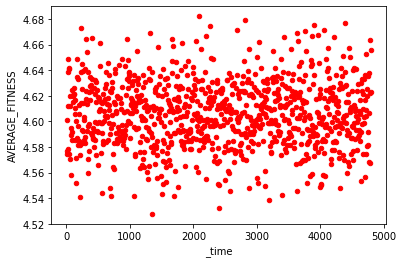

In [7]:
series_one.get_plot('_time', compared_field)

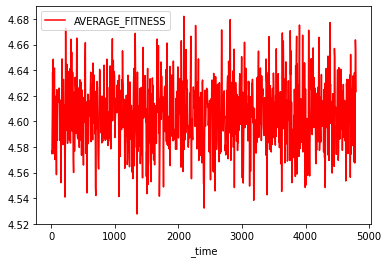

In [8]:
series_one.get_plot('_time', compared_field, kind='line')

In [77]:
data_series_df = [s.get_data_frame() for s in data_series]

merged_full_df = data.DataHelpers.merge_data_frames(data_series_df)
merged_df = merged_full_df[['_time', 'series_name', compared_field]]
merged_df

,_time,series_name,AVERAGE_FITNESS
0,5.013092,5f0a35ea3c9eb043aa0ade95,4.577046
1,10.002131,5f0a35ea3c9eb043aa0ade95,4.574657
2,15.014143,5f0a35ea3c9eb043aa0ade95,4.601292
3,20.009512,5f0a35ea3c9eb043aa0ade95,4.638684
4,25.007677,5f0a35ea3c9eb043aa0ade95,4.612407
...,...,...,...
953,4767.511000,mean,4.567508
954,4772.506000,mean,4.622353
955,4777.501000,mean,4.663705
956,4782.495000,mean,4.655544


In [80]:
mean_std_df = merged_full_df[merged_full_df['series_name']=='mean'][['_time', compared_field, f'{compared_field}_STD']]
mean_std_df

,_time,AVERAGE_FITNESS,AVERAGE_FITNESS_STD
0,2.497,4.575852,0.001195
1,12.486,4.601292,0.000000
2,17.481,4.638684,0.000000
3,22.476,4.612407,0.000000
4,27.471,4.648622,0.000000
...,...,...,...
953,4767.511,4.567508,0.000000
954,4772.506,4.622353,0.000000
955,4777.501,4.663705,0.000000
956,4782.495,4.655544,0.000000


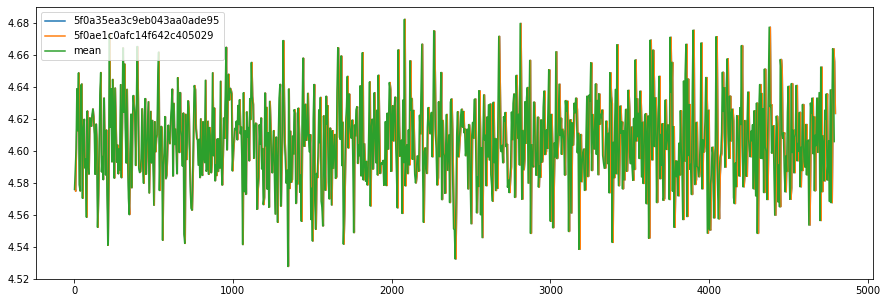

In [10]:
data.DataHelpers.comparison_plot([merged_df], compared_field, '_time')

In [43]:
compared_field = 'AVERAGE_FITNESS'
measurement = 'workplace_log'

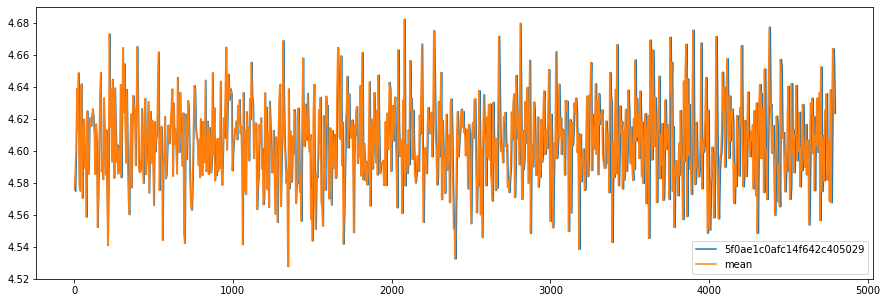

In [44]:
# Compare all evaluations for configuration
configuration_id = '5f0ae1c0afc14f642c405028'

r = stats_api.compare_evaluations_for_configuration(configuration_id, compared_field, measurement)
ds = data.DataHelpers.get_data_series(r)
data.DataHelpers.comparison_plot([s.get_data_frame() for s in ds], compared_field)

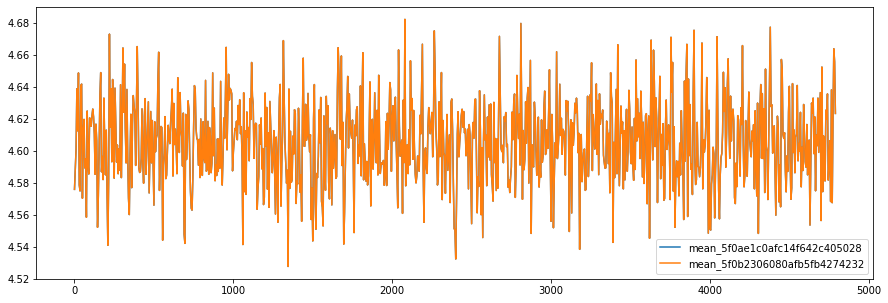

In [45]:
# Compare selected configurations
configuration_ids = ['5f0ae1c0afc14f642c405028', '5f0b2306080afb5fb4274232']

r = stats_api.compare_configurations(configuration_ids, compared_field, measurement)
ds = data.DataHelpers.get_data_series(r)
data.DataHelpers.comparison_plot([s.get_data_frame() for s in ds], compared_field)

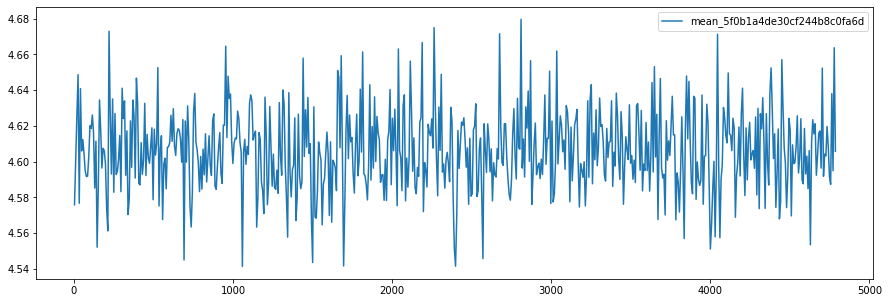

In [46]:
# Compare all configurations for experiment
experiment_name = 'EMAS'
r = stats_api.compare_configurations_for_experiment(experiment_name, compared_field, measurement)
ds = data.DataHelpers.get_data_series(r)
data.DataHelpers.comparison_plot([s.get_data_frame() for s in ds], compared_field)